# 04 - Supervised learning

In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

df_sel = pd.read_csv("../data/heart_disease_selected.csv")
X = df_sel.drop(columns=["target"])
y = df_sel["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [2]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=5000, solver='saga', multi_class='multinomial'),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42)
}

results = {}
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    proba = m.predict_proba(X_test) if hasattr(m, "predict_proba") else None
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "report": classification_report(y_test, y_pred, output_dict=True),
        "proba": proba
    }
    print(f"\n{name} accuracy:", results[name]['accuracy'])
    print(classification_report(y_test, y_pred))


c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



LogisticRegression accuracy: 0.6
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        32
           1       0.33      0.09      0.14        11
           2       0.20      0.14      0.17         7
           3       0.27      0.43      0.33         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.31      0.33      0.30        60
weighted avg       0.52      0.60      0.54        60


DecisionTree accuracy: 0.5
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.32      0.55      0.40        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.50        60
   macro avg       0.25      0.26      0.25        60
weighted avg   

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\met

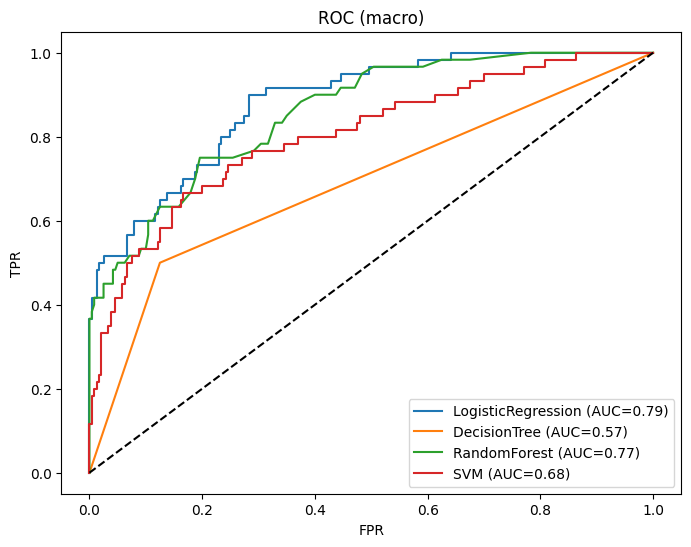

In [3]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))
for name, m in models.items():
    if hasattr(m, "predict_proba"):
        y_proba = m.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.legend(); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (macro)"); plt.show()


In [4]:
import json
metrics = {name: results[name]['accuracy'] for name in results}
with open("../results/evaluation_metrics.txt","w") as f:
    f.write("Baseline accuracies:\n")
    f.write(json.dumps(metrics, indent=2))
print("Saved baseline metrics to ../results/evaluation_metrics.txt")


Saved baseline metrics to ../results/evaluation_metrics.txt
